# <font color="blue">1.1- Randomisation</font>

One defines a deterministic model as a mathematical model in which outputs are precisely determined through known relationships among states and events. In such models, a given input $x$ will always produce the same output. 

E.g. $f(p, q)=p\times q$ where $p$, $q$ and $f(p, q)$ denote the price, quantity and the total amount of an item respectively. So $f(5, 2)=10$, always.

On the other hand, random models use values in the form of probability distributions, the outputs may (partially) or not depend on the input. 

E.g. $f(p, q) = r( [r_{min}, r_{max}])$ where $r$ denotes a random function that picts a value in the range. So $f(5, 2)=8$ or $f(5, 2)=12$ or $f(5, 2)=9$. This may become interesting if over different random experiments, we still have the same output.

<b>Randomisation is a sampling method used in scientific experiments to:</b>

<br>
<font color="blue">
<ul>
<li>Reduce selection bias.</li>
<li>Control temporal effects.</li>
<li>Perform statistical inference.</li>
</ul>
</font>

<br>
<font color="red">
<u><b>Learning Objectives</b></u>
<div class="panel-body">
<ul>
<li>Importance of randomisation.</li>
<li>Use of randomisation and its applications.</li>
</ul>
</div>
</font>

## <font color="blue">A-Random Walk (RW)</font>

RW (or stochastic process) is a mathematical method that describes a path that consists of a succession of random steps or positions. 

<u>Examples:</u>
<ul>
<li>The walk of a drunk.</li>
<li>The travel of a molecule in a liquid.</li>
<li>The price of a fluctuating stock of an item.</li>
<li>...</li>
</ul>

In [1]:
#import libraries
import numpy as np

In [3]:
np.random.uniform(low=1,high =4, size=(4,4))

array([[ 1.60160762,  3.34871848,  2.73049072,  2.4410924 ],
       [ 1.56423266,  3.15691752,  3.1539559 ,  1.86111591],
       [ 1.08801765,  2.74907436,  2.3278153 ,  3.52774504],
       [ 1.7073629 ,  2.93835865,  1.85326554,  1.93016329]])

In [12]:
x = [4,5,3,2,1,8,9]
np.random.choice(x)

4

## Walk in a graph

Given the following graph $G$, one needs extract a walk of a path of length $n$.

In [15]:
np.random.randint(10)

6

In [16]:
import networkx as nx

In [20]:
G = nx.Graph()
G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("B", "C")
G.add_edge("D", "B")
G.add_edge("C", "E")
G.add_edge("D", "E")
G.add_edge("E", "F")
G.add_edge("F", "G")
G.add_edge("G", "A")
G.add_edge("G", "H")
G.add_edge("F", "H")
G.add_edge("D", "H")
G.add_edge("F", "A")

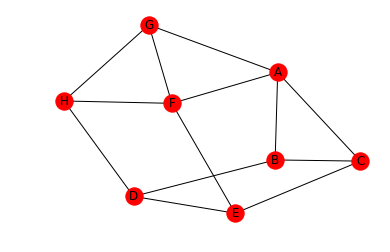

In [22]:
import matplotlib.pyplot as plt
nx.draw_networkx(G,  with_labels=True)
plt.axis('off')
plt.show()

In [23]:
G.nodes()

NodeView(('G', 'E', 'A', 'B', 'F', 'D', 'C', 'H'))

In [33]:
n_step = 8
rand_path = []
current_node = np.random.choice(G.nodes())
for i in range(n_step):
    rand_path.append(current_node)
    current_node = np.random.choice(list(G.neighbors(current_node)))
rand_path

['F', 'H', 'F', 'A', 'F', 'H', 'G', 'A']

In [34]:
dict_G={}
for node in G.nodes():
    dict_G[node]=list(G.neighbors(node))
dict_G

{'A': ['G', 'C', 'B', 'F'],
 'B': ['D', 'C', 'A'],
 'C': ['E', 'B', 'A'],
 'D': ['E', 'B', 'H'],
 'E': ['D', 'C', 'F'],
 'F': ['G', 'E', 'A', 'H'],
 'G': ['H', 'A', 'F'],
 'H': ['D', 'G', 'F']}

### b) Random walk

## <font color="blue">B-Monte Carlo (MC)</font>

MC is a computational method that relies on generated random sampling to obtain numerical results. It uses randomness to solve problems that might be deterministic. They are most useful when it is difficult or impossible to use other approaches. 

<b>Monte Carlo:</b>
<font color="blue">
<ul>
<li>Optimizes.</li>
<li>Performs numerical integration.</li>
<li>Generates samples from a probability distribution.</li>
</ul>
</font>

## B.0- Numerical Integration

Integrals are trivial to compute using a MC. A bounded integration of a function is the area under this function within a polygone. Thus, to find the area under a curve (function), one needs to create a bounding box (polygone) that contains the function (curve) in the desired interval.  You can use MC to numerically integrate any function, even non-integrable and noncontinuous functions.

#### Example

Suppose we want to know the area under the curve $y=\int  (x^2+1) \, \mathrm{d}x$ in  [0, 2]. The area is computed with the definite integral $\int_0^2  (x^2+1)\, \mathrm{d}x$.

### a) Deterministic method

In [1]:
def f(x):
    return x**2+1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.get_printoptions()

{'edgeitems': 3,
 'floatmode': 'maxprec',
 'formatter': None,
 'infstr': 'inf',
 'legacy': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'precision': 8,
 'sign': '-',
 'suppress': False,
 'threshold': 1000}

In [5]:
dx = 0.001
x = np.arange(0, 2, dx)
y =f(x)
np.sum(y)*dx

4.664667

### b) Random method

Generate randomly positioned point within a rectangle, and compute the ratio of points that fall under the curve. Its accuracy depends on the number of points generated: a few thousand points will give you a fairly accurate result.

In [6]:
counter

NameError: name 'counter' is not defined

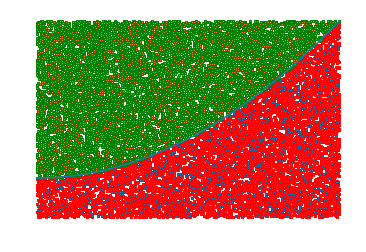

In [7]:
xmin = 0
xmax = 2
ymin = 0
ymax = f(xmax)
N= 20000
xdata = np.random.uniform(xmin, xmax, N)
ydata =  np.random.uniform(ymin, ymax, N)
eye = ydata<=f(xdata)
plt.plot(x, y)
plt.scatter(xdata[eye], ydata[eye], marker=',', edgecolors='r', s=2)
plt.scatter(xdata[~eye], ydata[~eye], marker=',', edgecolors='g', s=2)
plt.axis('off')
plt.show()

In [53]:
box_area = (xmax-xmin)*(ymax-ymin)
counter = 0
for i in range(N):
    if ydata[i]<=f(xdata[i]):
        counter = counter + 1
# inference
fnArea = box_area*float(counter)/N
fnArea

4.6735

## B.1- Approximation of $\pi$

Let's estimate the value of $\pi$ by finding the area of a circle of radius r bounded a square. The area of the square is is $A= 4r^2$. We also know that the surface of a circle is $C = \pi r^2$, so we compute $\pi = C / r^2$. 

The approach is to generate a set of uniformly distributed random points within the box, and count how many fall inside the circle.

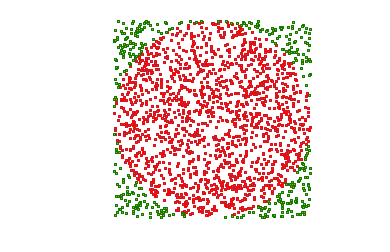

In [69]:
N= 2000
radius = 1
box_area = (2*radius)**2
# points inside the box
points = np.random.uniform(-radius, radius, (N, 2))
# distance from (0,0)
distances = np.linalg.norm(points, axis =1)
in_circle = distances < radius

#plot
plt.scatter(points[in_circle, 0], points[in_circle, 1], marker=',',
            edgecolors='r', s=2)
plt.scatter(points[~in_circle, 0], points[~in_circle, 1], marker=',',
            edgecolors='g', s=2)
plt.axis('equal')
plt.axis('off')
plt.show()

In [70]:
number_points_inside_circle = np.count_nonzero(in_circle)
# surface of the circle
circle_area = box_area*float(number_points_inside_circle)/N
circle_area, box_area

(3.222, 4)

In [71]:
approx_pi = circle_area/(radius**2)
approx_pi

3.222

### Exercise

Propose Python code that distributes 10 scholarships to 50 AIMS students. 

In [72]:
# your answer
np.random.choice(50, 10, replace=False)

array([14, 13, 29, 15, 12, 28, 25, 24, 17, 41])

A list of ages contains 1700 values which represent the ages of 1700 AIMS alumnies. One needs to know the percentage of those who are under 30 years old by only extracting 300 out of 1700. Propose two solutions to solve this problem. Which method is the best? Why? 



In [82]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

In [83]:
ages = np.random.randint(24, 60, 1700)
#ages = np.random.choice(lo, 1700)
ages

array([51, 32, 31, ..., 52, 40, 50])

In [84]:
counter = ages<=30

In [85]:
np.count_nonzero(counter)

328

In [86]:
portion_ages = np.random.choice(ages, 300, replace =False)
counter_ = portion_ages<=30
np.count_nonzero(counter_)*(1700/300)

334.33333333333337

### Exercises

For each of the questions students should do the following:

* specifications
* Python codes
* testing and debugging 
* and documentation

### Data generation

Given a representative sample from a normal distribution (population). A sample is representative when it possesses all the necessary information of its population. Let assume the unknown population has 500 items and the sample is given by

25.125,  14.947,  10.047 ,  15.725, 12.841,  14.436,  20.00,  20.221, 20.322,  23.703,  
15.287,  20.659, 12.658,  13.987,  18.174,  20.179, 21.264,   5.227,  16.916,  16.658


0. estimate the mean and the standard deviation of the population.

    Propose two approaches to answer each of the following:

1. how many standard deviation from the mean should an element be in order to occur with probability less than 1% (from the population not from the sample)
2. items in the neighborhood of the mean of the population with standard deviation of 1
3. Repeat 2 and 3 (Python codes only) for N=1000, N=1200, N=1600, N=1800, N=2000 and N=2500. Check the representativeness of the sample against each population.
4. Visualise the normal distribution over the population obtained from the above question using the most convenient representations.
5. discuss the two approaches proposed.

### Approximation

#### Newton

Recall the Newton-Raphson method for approximating a root of function f.

1. Use iteration to implement the method. Assume that you have procedures to return the values of f(x ) and f'(x ), given the value of x.
2. Show, by example, perhaps on a graph, that it is possible for the algorithm not to terminate.
3. Is it possible for the loop to terminate and not return the right answer? Give an example.
4. Specifying your implementation of the Newton-Raphson method. Those examples demonstrate the importance of this specification: it tells the user of the method when the method returns an accurate answer. Thus it must make some assumptions about the function f .

#### Numerical integration

1. Find a numerical solution to evaluate the area under the curve $y= \frac{1}{x^2}$ in [0, 2]. 
2. Find a numerical solution to evaluate the area under the curve $y= \mathrm{e}^{\sin(x)}$ in [0, $\pi$]. 